<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [38]:
# !wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

### Step 2: Import necessary libraries and load the dataset


In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [41]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [42]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [43]:
##Write your code here
filtered = df[['JobSatPoints_6', 'JobSatPoints_7', 'Age']]
filtered = filtered.dropna()

In [44]:
filtered = filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()
filtered

,Age,JobSatPoints_6,JobSatPoints_7
0,18-24 years old,15.0,20.0
1,25-34 years old,20.0,15.0
2,35-44 years old,20.0,15.0
3,45-54 years old,20.0,15.0
4,55-64 years old,20.0,20.0
5,65 years or older,20.0,15.0
6,Prefer not to say,10.0,7.0
7,Under 18 years old,1.5,5.0


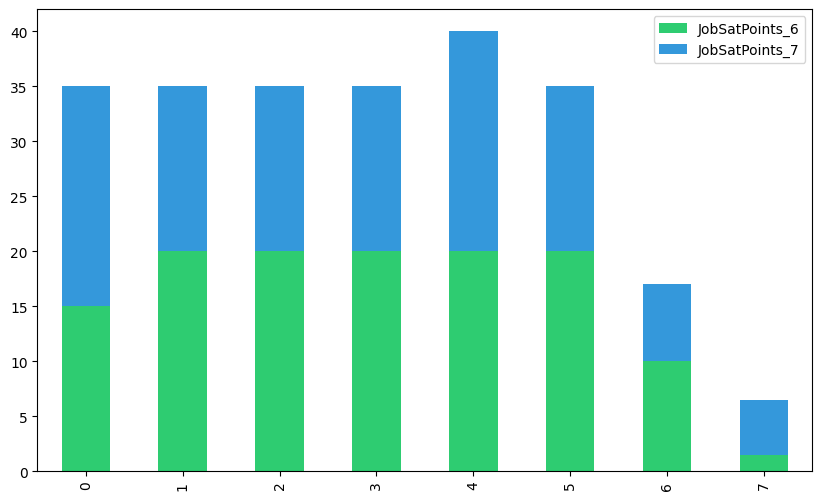

In [45]:
filtered.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2ecc71', '#3498db'])
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


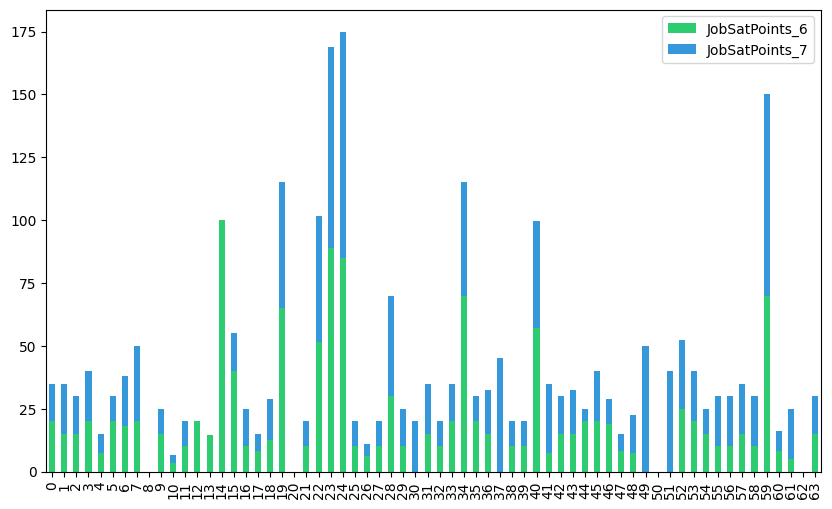

In [46]:
##Write your code here
filtered = df[['JobSatPoints_6', 'JobSatPoints_7', 'Employment']]
filtered = filtered.dropna()
filtered = filtered.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()
filtered.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2ecc71', '#3498db'])
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [47]:
def get_age_midpoint(age_range):
    if age_range == 'Under 18 years old':
        return 17  # Assuming average of 0-17
    elif age_range == '65 years or older':
        return 75  # Assuming average of 65-85
    elif age_range == 'Prefer not to say':
        return None
    else:
        ages = [int(x) for x in age_range.split()[0].split('-')]
        return sum(ages) / 2

In [62]:
##Write your code here
filtered = df[['JobSatPoints_6', 'ConvertedCompYearly', 'Age']]
filtered = filtered.dropna()
filtered = filtered.where((filtered['Age'] == '25-34 years old')).dropna()
filtered = filtered.groupby('Age')[['JobSatPoints_6', 'ConvertedCompYearly']].mean().reset_index()
filtered

,Age,JobSatPoints_6,ConvertedCompYearly
0,25-34 years old,26.168954,77890.846589


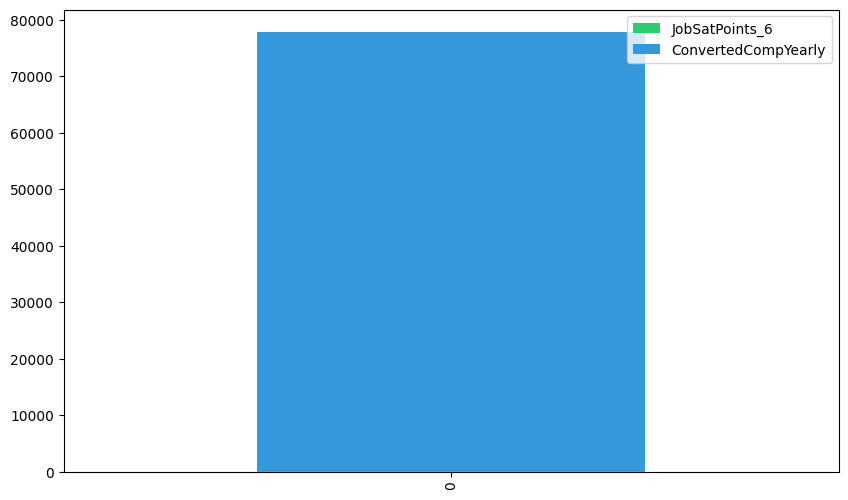

In [63]:
filtered.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2ecc71', '#3498db'])
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


In [64]:
##Write your code here
filtered = df[['JobSat', 'ConvertedCompYearly', 'Age']]
filtered = filtered.dropna()
filtered = filtered.groupby('Age')[['JobSat', 'ConvertedCompYearly']].median().reset_index()
filtered

,Age,JobSat,ConvertedCompYearly
0,18-24 years old,7.0,25443.0
1,25-34 years old,7.0,60000.0
2,35-44 years old,7.0,85905.5
3,45-54 years old,8.0,101770.0
4,55-64 years old,8.0,118263.0
5,65 years or older,8.0,121668.0
6,Prefer not to say,8.5,133023.5
7,Under 18 years old,8.0,8661.0


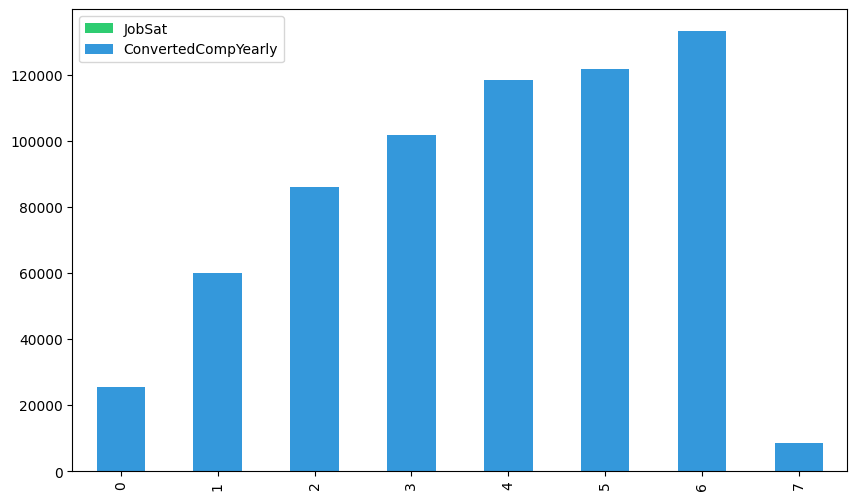

In [65]:
filtered.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2ecc71', '#3498db'])
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [79]:
##Write your code here
filtered = df[['DatabaseAdmired', 'Age']].dropna()
filtered = filtered.groupby(['Age','DatabaseAdmired'])['DatabaseAdmired'].count().to_frame().rename(columns={'DatabaseAdmired': 'Counts'}).reset_index()
filtered = filtered.groupby(['Age'])[['DatabaseAdmired','Counts']].max().reset_index()
filtered

,Age,DatabaseAdmired,Counts
0,18-24 years old,Supabase,969
1,25-34 years old,TiDB,1947
2,35-44 years old,TiDB,1223
3,45-54 years old,Supabase,456
4,55-64 years old,Supabase,217
5,65 years or older,TiDB,38
6,Prefer not to say,Supabase,12
7,Under 18 years old,Supabase,143


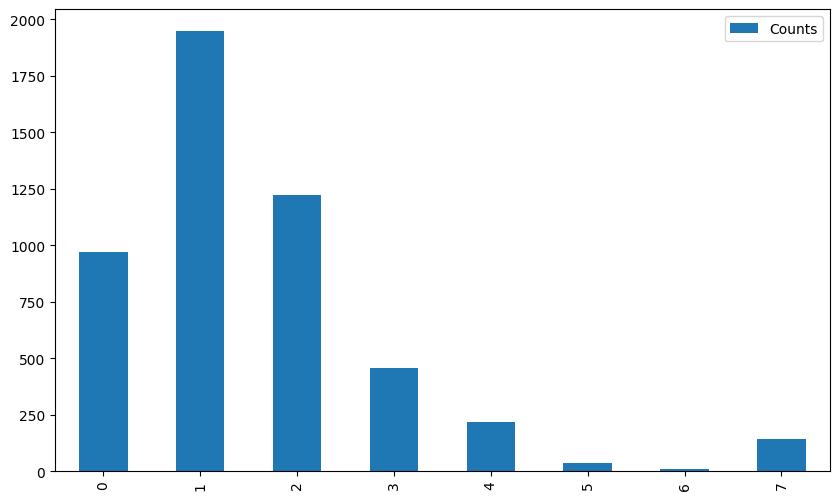

In [80]:
filtered.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [85]:
##Write your code here
filtered = df[['Employment', 'JobSat']].dropna()
filtered = filtered.groupby(['Employment','JobSat'])['Employment'].count().to_frame().rename(columns={'Employment': 'Counts'}).reset_index()
filtered

,Employment,JobSat,Counts
0,"Employed, full-time",0.0,242
1,"Employed, full-time",1.0,209
2,"Employed, full-time",2.0,599
3,"Employed, full-time",3.0,900
4,"Employed, full-time",4.0,848
...,...,...,...
290,"Student, part-time;Employed, part-time",6.0,31
291,"Student, part-time;Employed, part-time",7.0,57
292,"Student, part-time;Employed, part-time",8.0,61
293,"Student, part-time;Employed, part-time",9.0,29


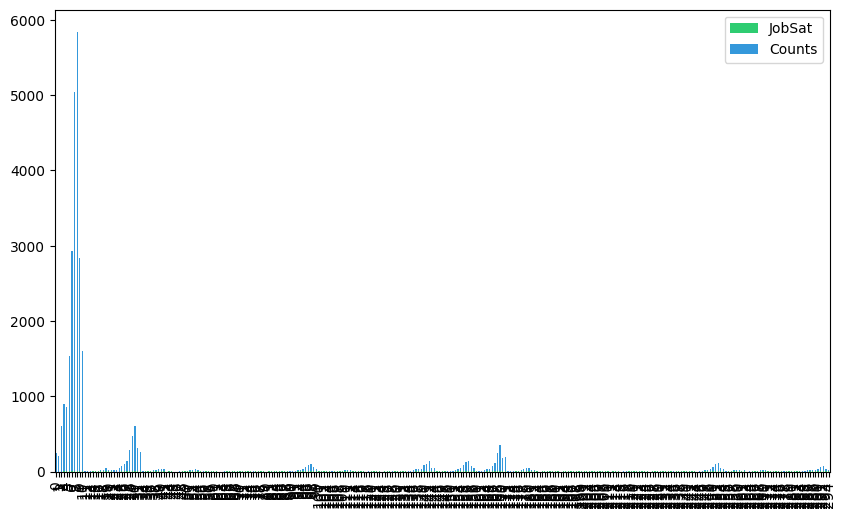

In [82]:
filtered.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2ecc71', '#3498db'])
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [86]:
##Write your code here
filtered = df[['LanguageAdmired', 'Age']].dropna()
filtered = filtered.groupby(['LanguageAdmired','Age'])['LanguageAdmired'].count().to_frame().rename(columns={'LanguageAdmired': 'Counts'}).reset_index()
filtered

,LanguageAdmired,Age,Counts
0,Ada,18-24 years old,6
1,Ada,25-34 years old,18
2,Ada,35-44 years old,12
3,Ada,45-54 years old,4
4,Ada,55-64 years old,5
...,...,...,...
18228,Zig,35-44 years old,1
18229,Zig,45-54 years old,1
18230,Zig,55-64 years old,2
18231,Zig,Prefer not to say,1


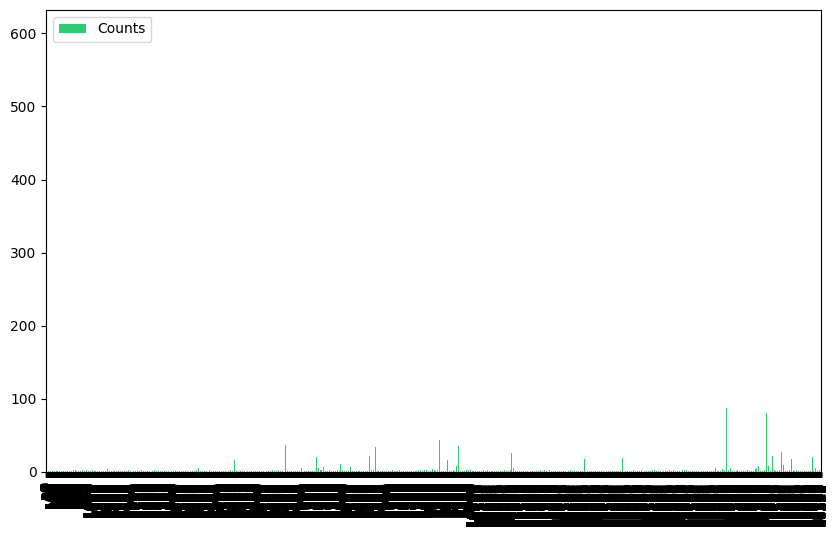

In [87]:
filtered.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2ecc71', '#3498db'])
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [88]:
##Write your code here
filtered = df[['PlatformAdmired', 'Employment']].dropna()
filtered = filtered.groupby(['PlatformAdmired','Employment'])['PlatformAdmired'].count().to_frame().rename(columns={'PlatformAdmired': 'Counts'}).reset_index()
filtered

,PlatformAdmired,Employment,Counts
0,Alibaba Cloud,"Employed, full-time",41
1,Alibaba Cloud,"Employed, full-time;Independent contractor, fr...",1
2,Alibaba Cloud,"Employed, full-time;Student, full-time;Indepen...",1
3,Alibaba Cloud,"Employed, full-time;Student, full-time;Indepen...",1
4,Alibaba Cloud,"Employed, full-time;Student, full-time;Not emp...",1
...,...,...,...
5573,Vultr,"Not employed, but looking for work",2
5574,Vultr,"Student, full-time",13
5575,Vultr,"Student, full-time;Employed, part-time",1
5576,Vultr,"Student, full-time;Independent contractor, fre...",1


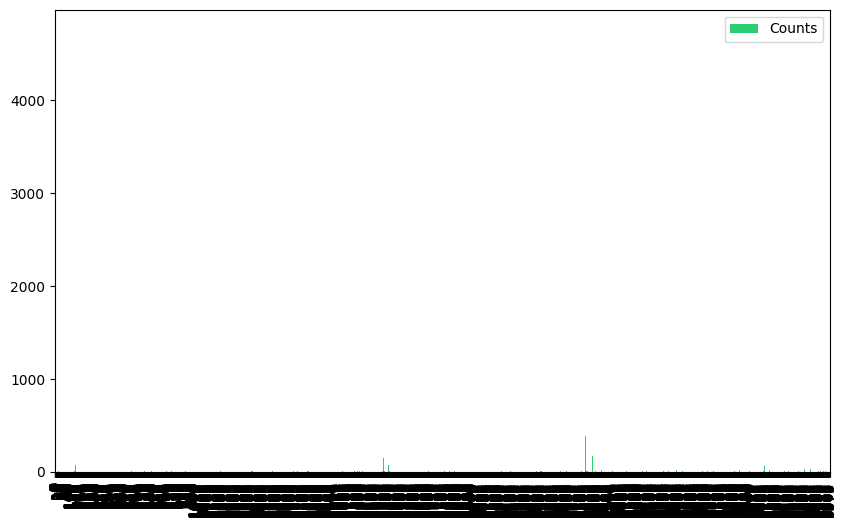

In [89]:
filtered.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#2ecc71', '#3498db'])
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
